# COGS 108 - Final Project 

# Overview

The project investigates the relationships between the yelp rating scores and CES 2.0 scores. It further examines whether there are correlations between the yelp rating and pollution-related indices within CES 2.0 algorithm, including the Particulate Matter 2.5 index, Diesel Particulate Matter index, and Drinking Water index. The result shows a negative correlation statistically significant between the yelp rating and CES 2.0 scores and no correlation between the yelp rating and pollution-related indices. 

# Name & GitHub

- Name: Yuan Tang
- GitHub Username: holatangyuan

# Research Question

How do the yelp ratings of parks relate to its surrounding enviromental screen indices in the city of San Diego? For the indices, the research is interested in the composite score, which is the CES 2.0 score, and more detailed pollution-related enviromental indices, including Particulate Matter 2.5, Diesel Particulate Matter, and Drinking Water.

## Background and Prior Work

There are more than 400 parks and 57 recreation centers in San Diego (1). The Parks & Recreation center (PRC) is one of the essential facilities in communities, which brings people happiness and opportunities to play with their pets, communicate with their friends, and do sports. Since the parks can accommodate many people, scientists should pay close attention to the environmental factors concerning human health. One of the most common indicators of ecological health is Particulate Matter (PM). Particularly, Particulate Matter 2.5 stands for "fine inhalable particles" with "diameters that are generally 2.5 micrometers and smaller" (2). A higher index of PM 2.5 refers to a higher concentration of 2.5 micrometers and smaller particles in the air. According to the research conducted by Tainio et al., "In areas with PM2.5 concentrations of 100ug/m3," the harms to human health outweighs the benefits brought by more than 1h 30min's cycling and 10h's walking(3). That is to say, having a lower concentration of PM 2.5 particles around the parks is essential for parks as major walking and cycling facilities for all ages. Other indicators, for instance, diesel particulate matter which stands for waste produced by diesel engines "containing a mixture of gases and solid particles" (4), and contaminant index in drinking water which refers to the health of water, are also vital attributes to ecological well-being. Moreover, this project will also utilize a composite index, the CalEnviroScreen Score (CES)(5), concerning environmental health and population characteristics to deliver an overall sense of the San Diego parks' ecological environment. <br>$\;\;\;\;\;\;$People usually rate their experience on yelp. So, the yelp ratings and the parks indicate how the parks’ overall qualities are. My research investigates the correlations between the yelp ratings of parks in San Diego and their surrounding ecological factors, including CES, Pm 2.5, diesel PM, and drinking water. Suppose the study concludes a negative correlation between the parameters. In that case, the environmental factors may significantly impact yelp ratings so that government can utilize the rating to predict the regional ecological attributes.

References (include links):
- 1)https://www.sandiego.gov/parks-and-recreation
- 2)https://www.epa.gov/pm-pollution/particulate-matter-pm-basics
- 3)https://www.sciencedirect.com/science/article/pii/S0091743516000402
- 4)https://oehha.ca.gov/calenviroscreen/indicator/diesel-particulate-matter
- 5)https://data.ca.gov/dataset/calenviroscreen-2-0

# Hypothesis


I hypothesize that the better ratings, the lower is the CES 2.0 score. A lower CES 2.0 score indicates less environmental pollution and healthier population characteristics. Higher yelp ratings stand for communities' affection for the rated parks so that higher rating parks should generally have better environmental indicators, such as better breathable air and drinkable water. Thus, there should also be a negative relationship between the ratings and Particulate Matter 2.5, Diesel Particulate Matter, and Drinking Water indices since lower scores of those variables refer to a better living environment.*

# Dataset(s)

The ideal datasets for this research should contain the name of the parks, the location for each park, and the environmental indicators, including CES 2.0  scores, the Particulate Matter 2.5 index, Diesel Particulate Matter index, and Drinking Water index for each location. 

- Dataset Name: San Diego Parks Yelp Data
- Link to the dataset: https://www.yelp.com/
- Number of observations: 833
- Description: The dataset contains the information about each park's name, location, identification, and yelp rating in San Diego.


- Dataset Name: California Environmental Health Screening Data
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 8035
- Description: The dataset contains the environmental screening information for each region in California. Environmental screening refers to environmental effects and population characteristics. 


<br>I plan to combine the datasets based on locations, specifically the zip code, to show the relationship between ratings and environmental screening indices. I will focus on the zip code for the location since the zip code divides San Diego into different districts. And the environmental screening data in different zip code areas represent the surrounding environment for the parks.

# Setup

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

import patsy
import statsmodels.api as sm

%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data
df_parks = pd.read_csv('../data/yelp_SD_parks.csv')
df_envir = pd.read_csv('../data/calenviroscreen-final-report.csv')
print(df_parks.shape)
print(df_envir.shape)

(833, 10)
(8035, 52)


# Data Cleaning

<font size='4'> **Cleaning df_parks**

In [3]:
#Reduce columns for data df_parks
df_parks = df_parks.drop(columns = ['phone', 'id', 'url', 'longitude', 'latitude', 'review_count'])
print(df_parks.isna().any())
print(df_parks.shape)
df_parks.head()

name         False
address      False
rating       False
is_closed    False
dtype: bool
(833, 4)


,name,address,rating,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",4.5,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",4.5,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",4.5,False
4,Bay View Park,"413 1st St Coronado, CA 92118",5.0,False


In [4]:
#Clean the parks that are unopen
df_parks = df_parks.loc[df_parks['is_closed'] == False]
print(df_parks.shape)

(832, 4)


In [5]:
#Function to extract zip code from address for df_parks
def zip_extractor_parks(address):
    return address[-6:]

In [6]:
#Extract the zip codes for df_parks
df_parks['address'] = df_parks['address'].apply(zip_extractor_parks)
df_parks.head()

,name,address,rating,is_closed
0,Balboa Park,92101,5.0,False
1,Civita Park,92108,4.5,False
2,Waterfront Park,92101,4.5,False
3,Trolley Barn Park,92116,4.5,False
4,Bay View Park,92118,5.0,False


<font size='4'> **Cleaning df_envir**

In [7]:
#Reduce columns for data df_envir
df_envir = df_envir[['CES 2.0 Score', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Location 1']]
print(df_envir.shape)
df_envir.head()

(8035, 5)


,CES 2.0 Score,PM2.5,Diesel PM,Drinking Water,Location 1
0,89.22,14.746087,44.23,519.882370,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,83.71,14.619618,46.75,519.882370,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,83.47,14.554656,46.91,519.882370,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,83.08,14.937649,15.66,753.540501,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,82.95,14.506413,57.64,519.882370,"Fresno 93721\n(36.743062999999999, -119.7933565)"


In [8]:
#Delete rows that contain a null value for df_envir
df_envir = df_envir.dropna()
print(df_envir.isna().any())
df_envir.head()

CES 2.0 Score     False
PM2.5             False
Diesel PM         False
Drinking Water    False
Location 1        False
dtype: bool


,CES 2.0 Score,PM2.5,Diesel PM,Drinking Water,Location 1
0,89.22,14.746087,44.23,519.882370,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,83.71,14.619618,46.75,519.882370,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,83.47,14.554656,46.91,519.882370,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,83.08,14.937649,15.66,753.540501,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,82.95,14.506413,57.64,519.882370,"Fresno 93721\n(36.743062999999999, -119.7933565)"


In [9]:
#Function to extract the zip code from location for df_envir
def zip_extractor_envir(location):
    index = location.find('(')
    return location[index - 6:index - 1]

In [10]:
#Extract the zip codes for df_envir
df_envir['Location 1'] = df_envir['Location 1'].apply(zip_extractor_envir)
df_envir.head()

,CES 2.0 Score,PM2.5,Diesel PM,Drinking Water,Location 1
0,89.22,14.746087,44.23,519.882370,93706
1,83.71,14.619618,46.75,519.882370,93706
2,83.47,14.554656,46.91,519.882370,93706
3,83.08,14.937649,15.66,753.540501,93725
4,82.95,14.506413,57.64,519.882370,93721


In [11]:
#Rename the location 1 column to address
df_envir['address'] = df_envir['Location 1']
df_envir = df_envir.drop(['Location 1'], axis=1)
df_envir.head()

,CES 2.0 Score,PM2.5,Diesel PM,Drinking Water,address
0,89.22,14.746087,44.23,519.882370,93706
1,83.71,14.619618,46.75,519.882370,93706
2,83.47,14.554656,46.91,519.882370,93706
3,83.08,14.937649,15.66,753.540501,93725
4,82.95,14.506413,57.64,519.882370,93721


In [12]:
#Group df_envir by the address, and take the average of environmental indices
df_envir = df_envir.groupby(['address']).mean()
df_envir['address'] = df_envir.index
df_envir.reset_index(drop=True, inplace=True)
df_envir.head()

,CES 2.0 Score,PM2.5,Diesel PM,Drinking Water,address
0,53.521250,12.659726,29.553750,540.163907,90001
1,49.600833,12.596859,25.161667,492.751728,90002
2,55.684000,12.632340,29.824000,458.041467,90003
3,39.454706,12.488356,40.627647,458.041467,90004
4,33.357857,12.555043,48.243571,458.041467,90005


<font size='4'> **Merging**

In [13]:
#Delete rows that the address is not numeric and change address columns to integer type facilitating the merging step
df_parks = df_parks[pd.to_numeric(df_parks['address'], errors ='coerce').notnull()]
df_parks['address'] = pd.to_numeric(df_parks['address'])

df_envir = df_envir[pd.to_numeric(df_envir['address'], errors ='coerce').notnull()]
df_envir['address'] = pd.to_numeric(df_envir['address'])

In [14]:
#Merge the two dataframe based on address and drop the rows that contains null values
df = df_parks.merge(df_envir, on='address', how='left')
df = df.dropna()
df

,name,address,rating,is_closed,CES 2.0 Score,PM2.5,Diesel PM,Drinking Water
0,Balboa Park,92101,5.0,False,24.991429,10.412467,34.677143,233.407874
1,Civita Park,92108,4.5,False,15.160000,10.564535,30.646667,233.407874
2,Waterfront Park,92101,4.5,False,24.991429,10.412467,34.677143,233.407874
3,Trolley Barn Park,92116,4.5,False,18.431111,10.599022,30.214444,233.407874
4,Bay View Park,92118,5.0,False,10.565714,10.262761,10.114286,229.428650
...,...,...,...,...,...,...,...,...
822,Del Cerro - San Diego,92120,4.5,False,14.641667,10.766851,19.430000,247.310882
823,San Diego Metropolitan Transit System,92101,2.5,False,24.991429,10.412467,34.677143,233.407874
824,Petco Park,92101,4.0,False,24.991429,10.412467,34.677143,233.407874
825,Ann D. L'Heureux Memorial Dog Park,92008,3.0,False,14.893333,8.401015,10.056667,201.844961


In [15]:
#Check the type of each column
df.dtypes

name               object
address             int64
rating            float64
is_closed            bool
CES 2.0 Score     float64
PM2.5             float64
Diesel PM         float64
Drinking Water    float64
dtype: object

# Data Analysis & Results

<font size='4'> **The overview**

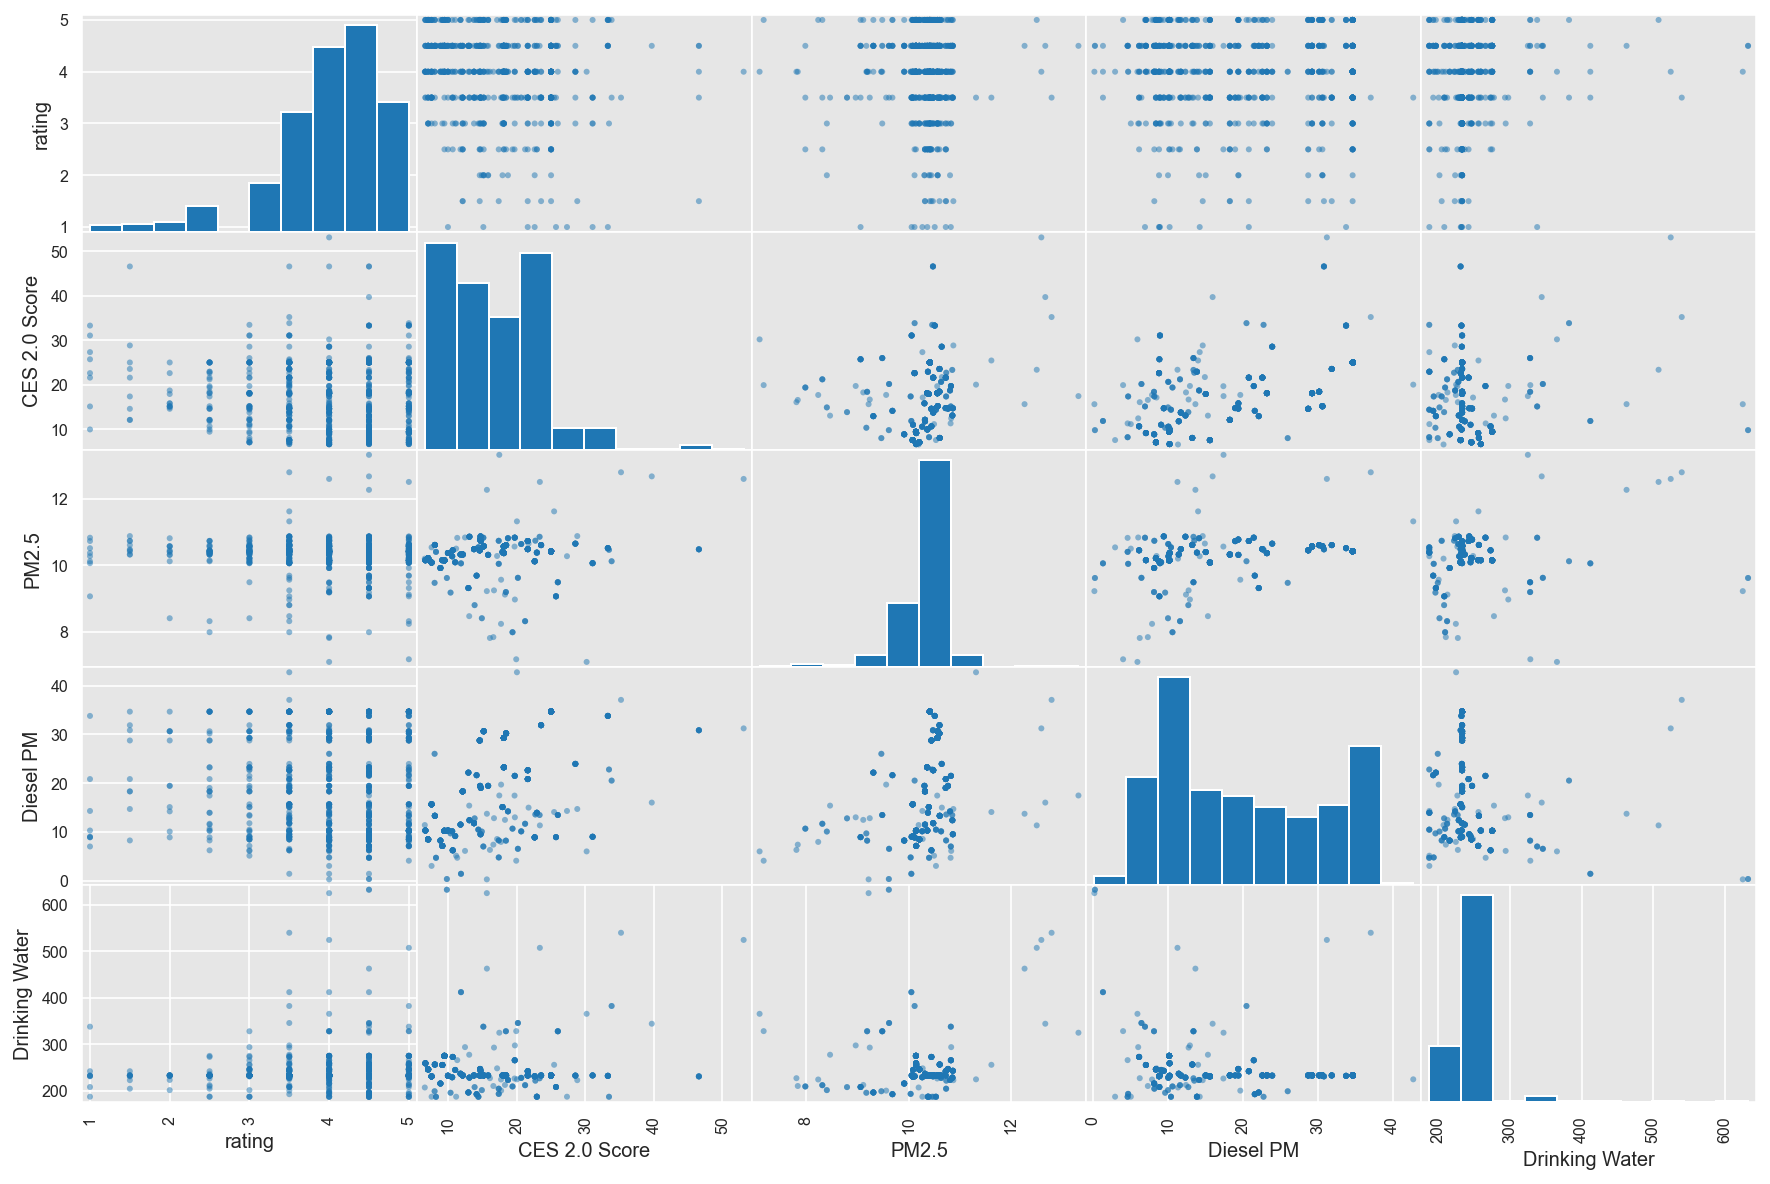

In [16]:
#The scatter matrix plot
ax = pd.plotting.scatter_matrix(df[['rating','CES 2.0 Score','PM2.5', 'Diesel PM', 'Drinking Water']], figsize=(15, 10))
plt.show()

Figure 1: The scatter matrix of df

Text(0, 0.5, 'Number of Parks')

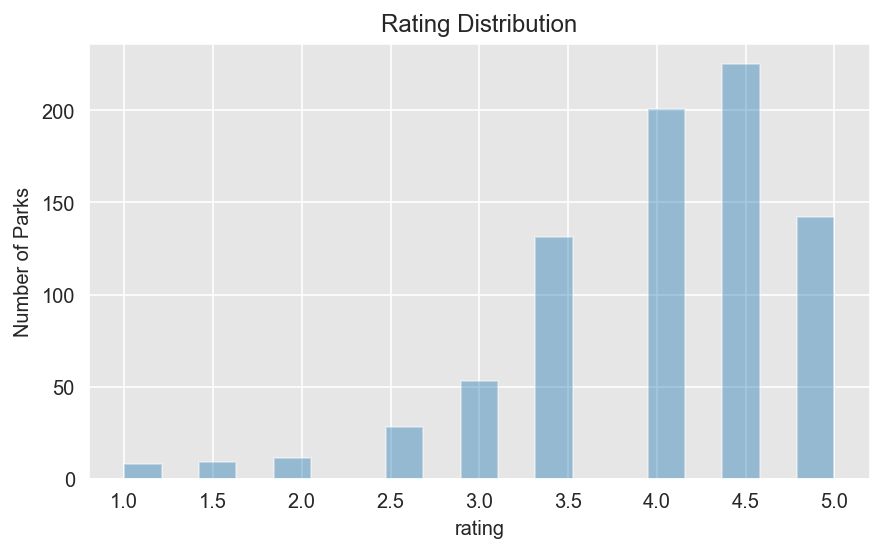

In [17]:
#Plot the rating distribution
plt.figure(figsize = (7,4))
ax = sns.distplot(df['rating'], kde = False)
ax.set_title('Rating Distribution')
ax.set_ylabel('Number of Parks')

Figure 2: Higher the rating score, the better the visitors' evaluation to the parks. Most parks are rated 4.5 points. 

<font size='4'> **Ratings and CES 2.0**

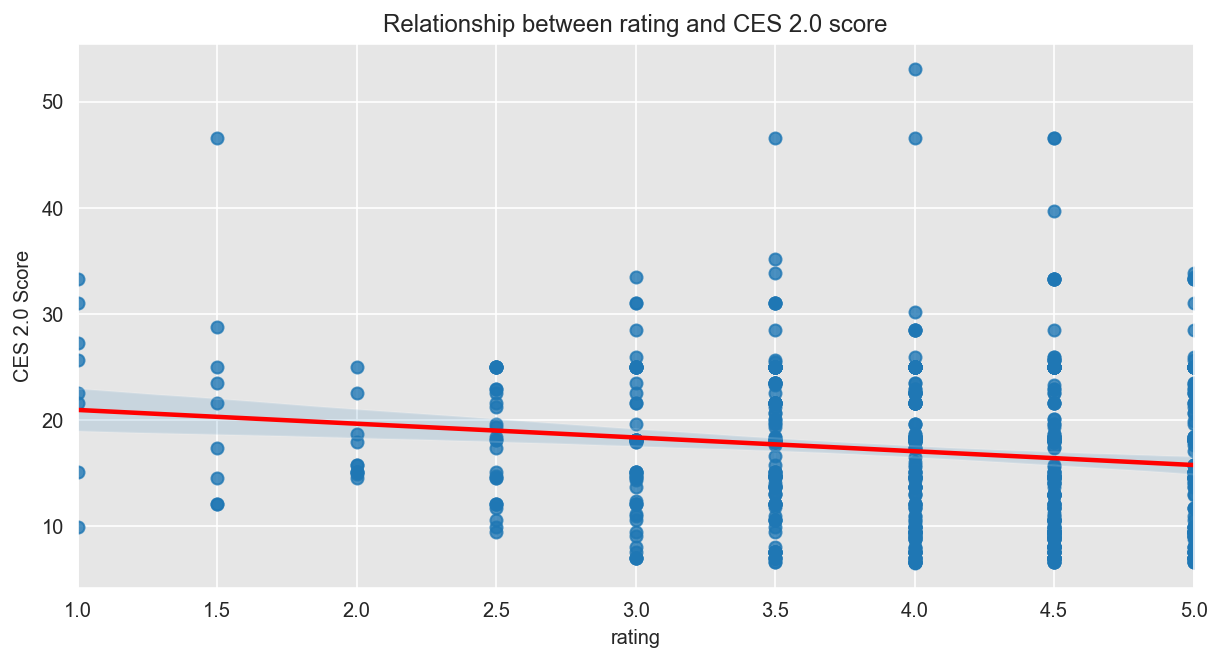

In [18]:
#Plot the relationship between rating and CES 2.0 Score
plt.figure(figsize = (10,5))
ax = sns.regplot(x = 'rating', y = 'CES 2.0 Score', data = df)
ax.set_title('Relationship between rating and CES 2.0 score')
regline = ax.get_lines()[0]
regline.set_color('red')
plt.show()

Figure 3: The graph shows the relationship between the yelp ratings and CES 2.0 scores. The red regression line reveals a negative relationship. 

In [19]:
#Rename the target column
df.rename(columns = {'CES 2.0 Score': 'CES'}, inplace = True)

#Linear Regression Analysis
outcome, predictors = patsy.dmatrices('CES ~ rating', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    CES   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.61
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           5.05e-05
Time:                        03:12:25   Log-Likelihood:                -2745.3
No. Observations:                 808   AIC:                             5495.
Df Residuals:                     806   BIC:                             5504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2632      1.307     17.029      0.0

Since the p-value is smaller than 0.05, the null hypothesis that the rating has no effect on CES 2.0 score is rejected. That is to say, there is a significant negative relationship between CES 2.0 scores and ratings. 

<font size='4'> **Ratings and PM 2.5**

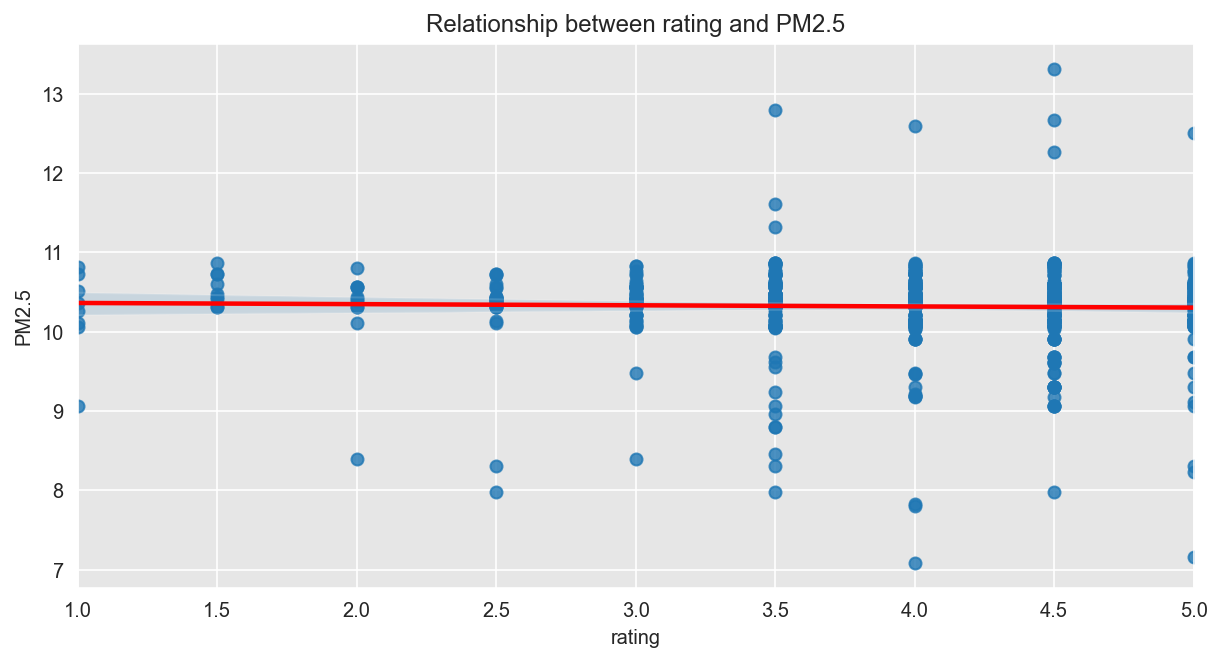

In [20]:
#Plot the relationship between rating and PM2.5
plt.figure(figsize = (10,5))
ax = sns.regplot(x = 'rating', y = 'PM2.5', data = df)
ax.set_title('Relationship between rating and PM2.5')
regline = ax.get_lines()[0]
regline.set_color('red')
plt.show()

Figure 4: The graph shows the relationship between the yelp ratings and PM 2.5. The higher PM 2.5 index, the higher is the Particulate Matter 2.5 concentrations. The red regression line reveals no significant relationship between those two variables. 

In [21]:
#Rename the target column
df.rename(columns = {'PM2.5': 'PM'}, inplace = True)

#Linear Regression Analysis
outcome, predictors = patsy.dmatrices('PM ~ rating', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4450
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.505
Time:                        03:12:26   Log-Likelihood:                -582.92
No. Observations:                 808   AIC:                             1170.
Df Residuals:                     806   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3773      0.090    115.329      0.0

Since the p-value is greater than 0.05, there is no significent relationship between ratings and PM 2.5 indices. 

<font size='4'> **Ratings and Diesel Particulate Matter**

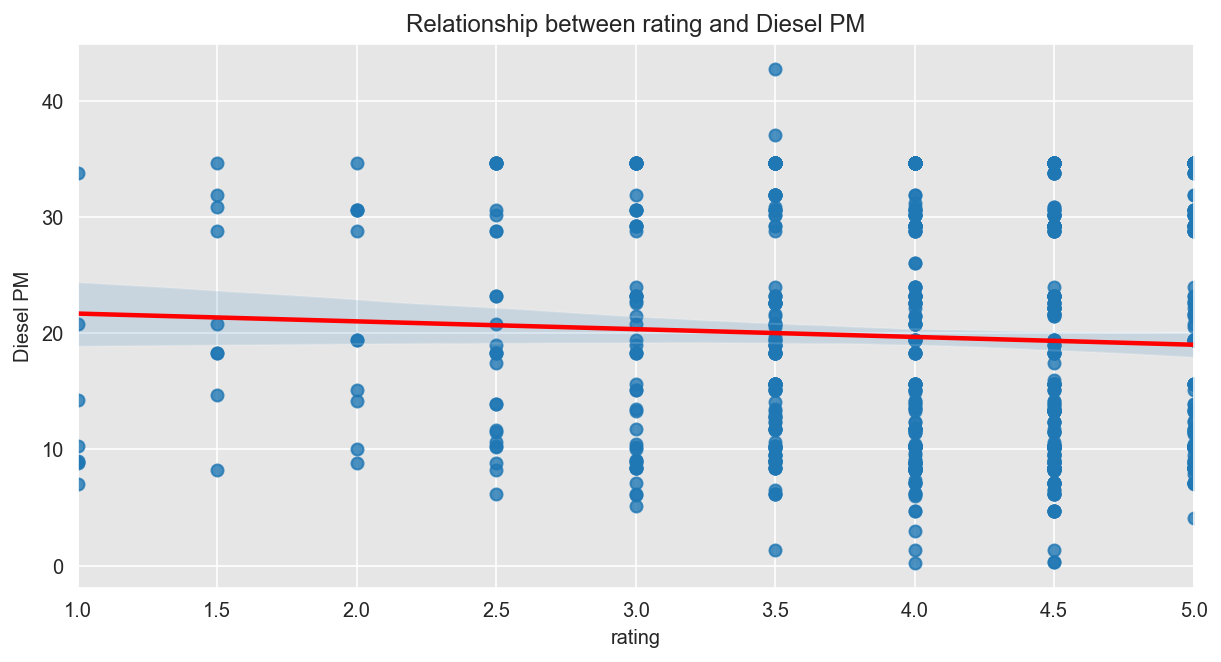

In [22]:
#Plot the relationship between rating and Diesel PM
plt.figure(figsize = (10,5))
ax = sns.regplot(x = 'rating', y = 'Diesel PM', data = df)
ax.set_title('Relationship between rating and Diesel PM')
regline = ax.get_lines()[0]
regline.set_color('red')
plt.show()

Figure 5: The graph shows the relationship between the yelp rating and Diesel PM. The higher the Diesel PM index, the higher is the Diesel PM emissions from on-road and non-road sources. The regression line shows a slight negative relationship between those two variables. 

In [23]:
#Rename the target column
df.rename(columns = {'Diesel PM': 'DPM'}, inplace = True)

#Linear Regression Analysis
outcome, predictors = patsy.dmatrices('DPM ~ rating', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    DPM   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.274
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.132
Time:                        03:12:26   Log-Likelihood:                -3015.7
No. Observations:                 808   AIC:                             6035.
Df Residuals:                     806   BIC:                             6045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.3625      1.827     12.239      0.0

Since the p-value is greater than 0.05, there is no significent relationship between ratings and Diesel PM indices. 

<font size='4'> **Ratings and Drinking Water**

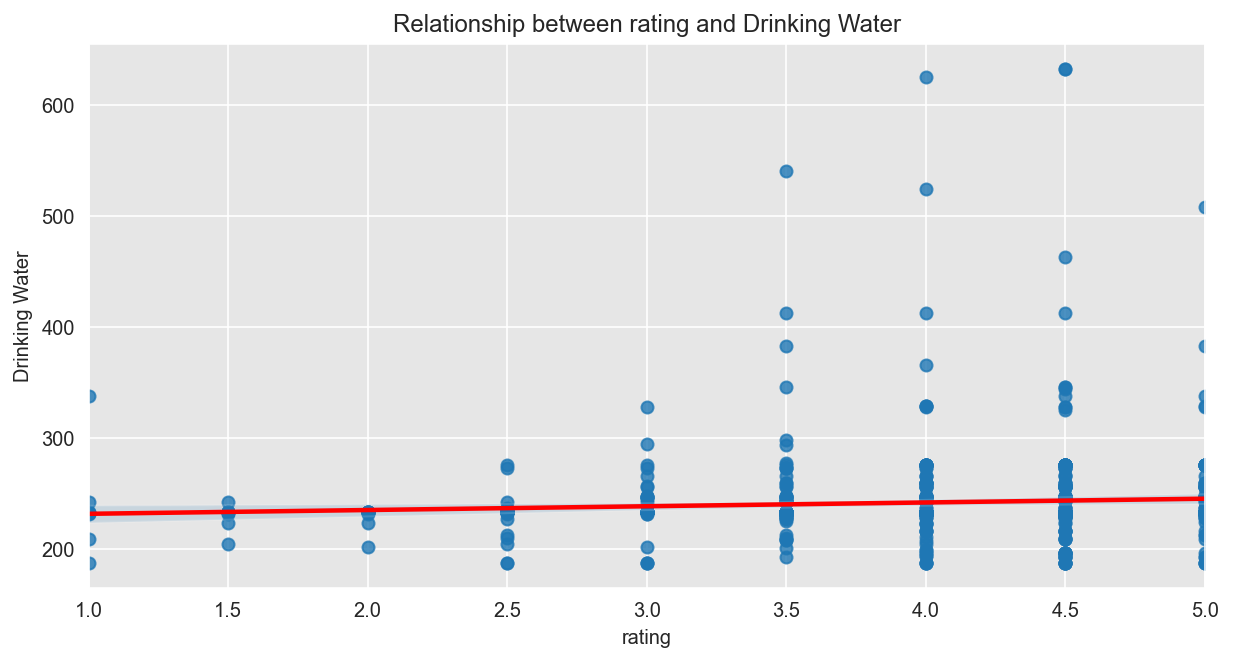

In [24]:
#Plot the relationship between rating and Drinking Water
plt.figure(figsize = (10,5))
ax = sns.regplot(x = 'rating', y = 'Drinking Water', data = df)
ax.set_title('Relationship between rating and Drinking Water')
regline = ax.get_lines()[0]
regline.set_color('red')
plt.show()

Figure 6: The graph shows the relationship between the yelp rating and drinking water. The higher the drinking water index, the more are the selected contaminants in drinking water. The regression line shows a slight positive relationship between those two variables.

In [25]:
#Rename the target column
df.rename(columns = {'Drinking Water': 'DM'}, inplace = True)

#Linear Regression Analysis
outcome, predictors = patsy.dmatrices('DM ~ rating', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     DM   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.729
Date:                Wed, 16 Dec 2020   Prob (F-statistic):             0.0538
Time:                        03:12:26   Log-Likelihood:                -4127.5
No. Observations:                 808   AIC:                             8259.
Df Residuals:                     806   BIC:                             8268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    228.2974      7.234     31.561      0.0

Since the p-value is greater than 0.05, there is no significent relationship between ratings and Drinking Water indices.

# Ethics & Privacy

The data collected about parks and environmental screening indices would not have significant privacy issues. The parks’ names and locations are publicly available on yelp. And the records of environmental screening information for each region in California is a government official document accessible to the public.<br>$\;\;\;\;\;\;$There should be concerns about the yelp rating system because the data may include identifiable information, for instance, yelp account, nicknames, or e-mails of personal identification. Luckily, in the yelp parks rating dataset, no information concerning individual privacy is provided, as I only got the average rating scores for each park. Even though the phone number happens to appear in the rating dataset, it is the park hotline that does not reveal any personal information.<br>$\;\;\;\;\;\;$The data are biased, and it is not universally true. In my research, the data is collected for San Diego; they may not imply the same pattern in other cities or states in the United States. Typically, environmental screening data is collected by inspectors. Human errors measuring biases inevitably exist in the screening dataset. Also, raters could bias the yelp rating system: people who live downtown tend to rate more than people who live in rural areas, so that park in the central city tends to have a higher rating rate than other parks. 

# Conclusion & Discussion

According to my analysis, my hypothesis that a higher rating score indicates a lower CES 2.0 score is correct. The negative relationship between yelp ratings and CES 2.0 scores is statistically significant since the p-value for the regression line is smaller than 0.05. However, my predictions of pollution-related indices having negative relationships with ratings are wrong. The statistics show large p-values for relationships between ratings and PM 2.5, ratings and diesel particulate matter, and ratings and drinking water. In other words, yelp ratings cannot predict the pollution-related indices.<br>$\;\;\;\;\;\;$There are several limitations to the datasets I have used in this research. First, there is no chronological information for the rating datasets. All I have is the average rating score without knowing how many people had rated or when the ratings began. Those data are essential since the rating system is dynamic: some parks are improving, and some are deteriorating.  The ratings for the parks that open longer tend to be compensated by time; whereas,  new parks' ratings are usually more extreme since the raters are less. Second, the screening dataset is also limited in terms of using the CES 2.0 algorithm. CES 3.0 algorithm is available to the public since 2018. It has refined the weight for each indicator and maybe a better representative as an overall environmental index. The third limitation is about using the combination of those two datasets. They may not match along the time course. Since I do not have the temporal data for yelp ratings, the screening indicators may not perfectly describe each park's surrounding environmental quality. 